<a href="https://colab.research.google.com/github/MalikaIT21277122/TimeSeriesAnalysis/blob/main/Random_Forest_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Improved Random Forest Model
Mean Squared Error (MSE): 9864.20
Mean Absolute Error (MAE): 83.29
R² Score: -0.03


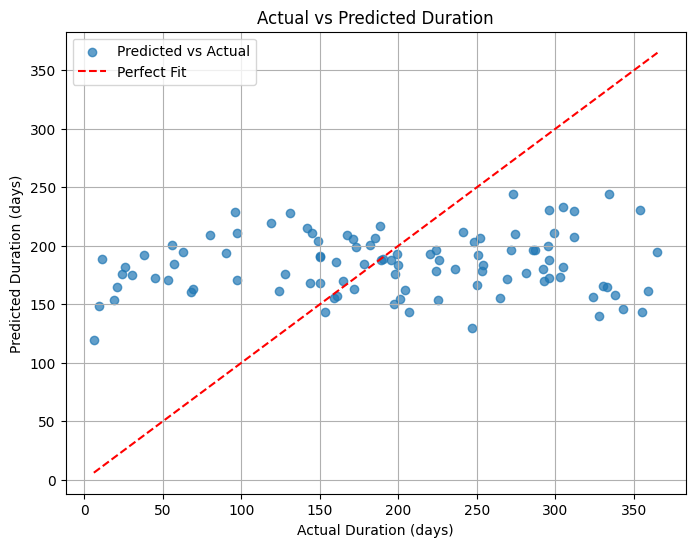

Predicted Duration for sample input: 184.66 days
Improved Model Accuracy: 54.16%


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_name = "CESAW_project_summary_Cleaned.csv"  # Replace with your dataset filename
data = pd.read_csv(file_name)

# Step 2: Data preprocessing
# Select features and target variable
X = data[['Team_Size', 'A&M_LoC', 'Effort_Hours']]  # Features
y = data['Duration_Days']  # Target variable

# Handle outliers (if any)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
y = y.loc[X.index]  # Adjust target variable index accordingly

# Scale features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Hyperparameter tuning
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 5: Train the optimized Random Forest model
best_rf.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R² Score

# Print the metrics
print("Improved Random Forest Model")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 7: Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit")
plt.title("Actual vs Predicted Duration")
plt.xlabel("Actual Duration (days)")
plt.ylabel("Predicted Duration (days)")
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Predict for a sample input
sample_input = pd.DataFrame({
    'Team_Size': [30],
    'A&M_LoC': [250000],
    'Effort_Hours': [7500]
})

# Scale the sample input using the same scaler
sample_input_scaled = scaler.transform(sample_input)
predicted_duration = best_rf.predict(sample_input_scaled)[0]
print(f"Predicted Duration for sample input: {predicted_duration:.2f} days")

# Step 9: Calculate Accuracy
average_duration = y.mean()
accuracy = 1 - (mae / average_duration)
print(f"Improved Model Accuracy: {accuracy:.2%}")
